<a href="https://colab.research.google.com/github/mabittar/Cookbook/blob/master/Scaper_YouTube_Kondizilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informações e Estatistas de canais do YouTube

Esse notebook nasceu como um exercício de fixação de conceitos de criação e utilização de um  Web Scraper para obtenção de dados estatísticos de canais do YouTube.

Adiante será visto que existem restrições e limitações para a utilização dessa ferramenta. O Youtuber promove a utilização de API's, portanto foi possível utilizar-se dessa ferramenta para contornar essa restrição.

## Youtube

Não é uma novidade que milhares de pessoas estão conseguindo montar uma verdadeira carreira no YouTube, o site deixou de ser apenas uma plataforma onde vídeos são postados despretensiosamente quando alguma cena diferente é gravada pela lente de uma câmera, agora, postar vídeo no YouTube se tornou um trabalho com potencial muito mais rentável que a própria televisão.

## Web Scraper 

Nesse web scraper  veremos como criar um algoritmo para baixar os metadados dos vídeos publicados em um canal do Youtube utilizando o [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

Esse é apenas um exemplo de aplicação de um Crawler, que pode ser utilizado para registrar preços de um produto, oportunidades de imóveis para venda ou locação, disponibilidade de servidores e assim por diante.

Web Crawler, bot ou web spider é um algoritmo utilizado para encontrar, ler e gravar informações de páginas da internet. É como um robô que varre o caminho indicado e captura as informações que encontra pela frente.

Um dos maiores exemplos de um web crawler é o próprio google. Antes do site estar disponível para pesquisa, um robô lê o web site e cataloga as informações de forma a serem recuperadas numa busca futura.


Para esse web scrapper dividi o script em funções específicas a fim de facilitar qualquer possível manutenção.

### Connect to Target

O Canal Kondizilla.:

Muitos anos antes Konrad Dantas cresceu sonhando em trabalhar com música e, através dela, mudar sua realidade de garoto da periferia. Não imaginava que o sucesso que ira fazer. Mas somente quando Konrad se transformou no Kondzilla — o produtor musical que popularizou o funk ostentação no Brasil com videoclipes repletos de carros do ano, mansões e correntes de ouro. Ele construiu o maior canal de música do mundo no Youtube, com mais de 61 milhões de inscritos.

Resolvi fazer esse scraper e utilizar o canal de target como uma forma de fixar o aprendizado e explorar o pouco mais da biblioteca Selenium.

#### Iniciando o Selenium no Colab

In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.implicitly_wait(10)

     |████████████████████████████████| 911kB 6.0MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1,901 kB]
Get:14 http://ppa.lau

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [2]:
# importando demais bibliotecas necessárias
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import datetime
import time

In [75]:
# conectando ao site
link = 'https://www.youtube.com/c/PortalKondZilla/videos'

In [76]:
def get_data(link):

  """
  essa função mapeia o canal alvo e retorna os videos listados
  entrada: link para o alvo
  saída: lista de com videos do canal
  """
  response = requests.get(link)
  if response.status_code != 200:
    raise RuntimeError(f'Houve um erro de conexão. Cód: {response.status_code}')

  # conectando ao site
  wd.get(link)

  #navegando até o final da página
  for _ in range(56):
    wd.find_element_by_tag_name('body').send_keys(Keys.END)

  #obtendo dados do site:
  html = wd.page_source
  soup = BeautifulSoup(html, 'html.parser')
  videos = soup.find_all('div', {"id": "dismissable"})

  return videos

In [77]:
videos = get_data(link)

In [78]:
# checado a quantidade de itens armazenados
len(videos)

270

### Obtendo metadados do canal

In [79]:
# obtendo metadados

meta_list = []

for video in videos:
  meta_d = {}
  meta_d['title'] = video.find('a', {'id': 'video-title'}).text
  meta_d['link'] = "https://www.youtube.com/" + video.find('a', {'id': 'video-title'})['href']
  meta = video.find('div', {'id': 'metadata-line'}).find_all('span')
  meta_d['vis'] = meta[0].text
  meta_d['publ'] = meta[1].text
  meta_list.append(meta_d)
  

In [80]:
# Convertendo para um Pandas DataFrame
df = pd.DataFrame(meta_list)
df

,title,link,vis,publ
0,MC Kekel e Niack - É Funk ou Pagode? (KondZilla),https://www.youtube.com//watch?v=iyMP3bw3oDk,1.3K views,2 hours ago
1,HERvolution - A Revolução das Minas Na Cena (K...,https://www.youtube.com//watch?v=gGnEcNiZzVs,1.5K views,1 day ago
2,Curiosidades com Vulgo FK: Revoada Com MC Kevi...,https://www.youtube.com//watch?v=A3lsa0Ge-xk,10K views,2 days ago
3,Como Retomar Os Estudos Na Fase Adulta? - Kond...,https://www.youtube.com//watch?v=DvUY4clvah0,91K views,5 days ago
4,#TodosPelasVacinas com MC Fioti - Vai Com o Bu...,https://www.youtube.com//watch?v=OT7M291OAXw,81K views,6 days ago
...,...,...,...,...
265,Como Dançar Os Passinhos De Funk Com NGKS? (ko...,https://www.youtube.com//watch?v=7ZYSjZjCsbU,41K views,1 year ago
266,Empreendedores Da Quebrada - David Doces (kond...,https://www.youtube.com//watch?v=AnRBHTqoObw,2.5M views,1 year ago
267,Amor pelo Futebol de Várzea (kondzilla.com),https://www.youtube.com//watch?v=0xR1x1S6d0k,12K views,1 year ago
268,Origem MC - Conheça A Origem Do Movimento (kon...,https://www.youtube.com//watch?v=HocYcDqeqbk,8.7K views,1 year ago


### Tratando dados

In [81]:
def converter_vis(df):
  """ essa funcão converte os dados da coluna visualizações e subsititui as strings por números
  entrada: dataframe com a coluna['vis']
  processamento: recebe os dados da coluna e com base nas confições faz a substituição
  saída: dados tratados e devem ser atribuídos a uma nova coluna
  """
  if 'K' in df['vis']:
    k_views = float(df['vis'].split('K')[0])*1000
    return k_views
  elif 'M' in df['vis']:
    m_views = float(df['vis'].split('M')[0])*1000000
    return m_views
  else:
    views = float(df['vis'].split(' ')[0])
    return views

In [82]:
# Convertendo a visualização para inteiros
df['vis_conv'] = df.apply(converter_vis, axis=1)
df['vis_conv'] = df['vis_conv'].astype(int)

In [83]:
df['title'] = df['title'].astype(str)
df['publ'] = df['publ'].astype(str)

In [84]:
df.head()

,title,link,vis,publ,vis_conv
0,MC Kekel e Niack - É Funk ou Pagode? (KondZilla),https://www.youtube.com//watch?v=iyMP3bw3oDk,1.3K views,2 hours ago,1300
1,HERvolution - A Revolução das Minas Na Cena (K...,https://www.youtube.com//watch?v=gGnEcNiZzVs,1.5K views,1 day ago,1500
2,Curiosidades com Vulgo FK: Revoada Com MC Kevi...,https://www.youtube.com//watch?v=A3lsa0Ge-xk,10K views,2 days ago,10000
3,Como Retomar Os Estudos Na Fase Adulta? - Kond...,https://www.youtube.com//watch?v=DvUY4clvah0,91K views,5 days ago,91000
4,#TodosPelasVacinas com MC Fioti - Vai Com o Bu...,https://www.youtube.com//watch?v=OT7M291OAXw,81K views,6 days ago,81000


## Alguns Insights

Até essa etapa obtivemos uma quantidade razoável de dados, vamos observar alguns dados.

In [85]:
print('O total de publicações no canal são {} vídeos.' .format(len(df)))

O total de publicações no canal são 270 vídeos.


In [86]:
# podemos obter o total de visualizações do canal:
out_sum = df['vis_conv'].sum()
print('A soma total de visualizações é {:,}.' .format(out_sum))

A soma total de visualizações é 45,639,000.


In [28]:
# obter os metadados do vídeo mais visualizado
out_max = df.loc[df['vis_conv'] == df['vis_conv'].max()]

# obtendo o título
title_max  = out_max['title'].values[0]
# obtendo a data de publicação
publ_max = out_max['publ'].values[0]

# retornando informações
print('O vídeo mais visualizado foi: {}'.format(title_max))
print('O vídeo mais visualizado foi publicado em {}'. format(publ_max))

O vídeo mais visualizado foi: Dadá Boladão, Tati Zaqui feat OIK - Surtada Remix BregaFunk (kondzilla.com) | Official Music Video
O vídeo mais visualizado foi publicado em 1 year ago


## Obtendo informações por Vídeo  e Melhorando os Metadados

Algumas informações estão truncadas (visualizações = X K views) ou mesmo misturadas ( data de publicação: X days ago).

Procurando um pouco mais, podemos obter esses metadados acessando o link de cada vídeo e obter informações mais precisas.

O link já temos, mas como fazemos para obter esses metadados??

vamos aos passos.

In [29]:
# os links podem ser obtidos na variável (coluna) link:
df['link'].head()

0    https://www.youtube.com//watch?v=ufWTBoT-SOw
1    https://www.youtube.com//watch?v=wehFUSHNP3k
2    https://www.youtube.com//watch?v=euJjRBg4gqo
3    https://www.youtube.com//watch?v=k4cg3bavDTY
4    https://www.youtube.com//watch?v=7XfIyw0V-hU
Name: link, dtype: object

In [30]:
lista_links = df['link'].values
len(lista_links)

690

In [31]:
meta_videos = []
for url in lista_links:
  meta_v = {}
  # apenas para aguadar o site carregar as informações
  wd.set_page_load_timeout(30)
  wd.get(url)
  wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
  #element = WebDriverWait(wd, 30).until(EC.presence_of_element_located((By.ID, "info-contents")))
  #element = WebDriverWait(wd, 30).until(EC.presence_of_element_located((By.ID, "comments")))
  

  video_html = wd.page_source
  soup = BeautifulSoup(video_html, 'html.parser')
  meta_v['video_vis'] = int(soup.find('span', {'class': 'view-count'}).text.split()[0].replace(',', ''))
  meta_v['data'] = soup.find('div', {'id': 'date'}).text.replace('•', '').replace(',', '')
  meta_v['curtidas'] = soup.find('a',{'class': 'yt-simple-endpoint style-scope ytd-toggle-button-renderer'}).text
  meta_videos.append(meta_v)
wd.quit()

AttributeError: ignored

In [ ]:
len(meta_videos)

In [ ]:
lista_links[0]

In [ ]:
wd.get(lista_links[2])

In [ ]:
video_html = wd.page_source

In [ ]:
soup = BeautifulSoup(video_html, 'html.parser')

In [ ]:
soup

Como suspeitava o youtube está bloqueando o acesso por estar fora da política (acessos automatizados)

In [ ]:
soup.find('div', {'id': 'count '})

In [ ]:
video_vis = int(soup.find('span', {'class': 'view-count'}).text.split()[0].replace(',', ''))
video_vis

In [ ]:
date = soup.find('div', {'id': 'date'}).text.replace('•', '').replace(',', '').replace('Premieres ', '')
date = datetime.datetime.strptime(date, '%b %d %Y')
string_date = date.strftime('%Y-%b-%d')
string_date

In [ ]:
curtidas = int(soup.find('a',{'class': 'yt-simple-endpoint style-scope ytd-toggle-button-renderer'}).text)
curtidas

In [ ]:
soup.find_all('h2')

In [ ]:
<h2 id="count" class="style-scope ytd-comments-header-renderer">
    <yt-formatted-string class="count-text style-scope ytd-comments-header-renderer">67 comentários</yt-formatted-string>
  </h2>

Para contornar a situação debloqueio de acesso ao Youtube vamos utilizar a própria API Data do Youtube.

# YouTube API Data

Como visto anteriormente o YouTube restringe acessos automatizados a fim de evitar a sobre carga nos servidores.

Entrentado é possível acessar os dados estatísticos de cada vídeo utilizando a própria API do site.


Para criar o acesso a sua API do YouTube será necessários acessar o console de desenvolvedor, [link](https://console.developers.google.com/). Uma vez que você tenha feito login na conta, será necessário criar um novo projeto e requisitar a utilização da API do YouTube. 

Para utilizar essa API será necessário criar uma credencial. Como estamos trabalhando no Google Colab e esse projeto será enviado para o o GitHub, optei por salvar a API em um arquivo .txt e solicitar ao Colab que faça a leitura dessa arquivo. Assim a chave da credencial não fica exposta. 

No meu caso eu criei o arquivo `API-Youtube.txt`  assim fica mais fácil de lembrar.

Para saber mais sobre a API você também pode consultar a [documentação oficial](https://github.com/googleapis/google-api-python-client).

## Criando acessos e autenticações

In [33]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  with open(fn) as f:
        api_key = f.read()

Saving API-Youtube.txt to API-Youtube (1).txt
User uploaded file "API-Youtube.txt" with length 39 bytes


Para acessar os dados do canal será necessário fornecer a ID do canal. É o complemento do link que acessa diretamente o canal:


youtube.com/channel/ `UCBkXV7dgFRUaDOk2saJooxA`


In [72]:
# informar a id do canal
id = 'UCBkXV7dgFRUaDOk2saJooxA'

In [73]:
import json
from googleapiclient.discovery import build

metadados = build('youtube', 'v3', developerKey=api_key)

## Obtendo informações e metadados

Nós já criamos as credenciais e obtivemos corretamente o acesso a API. Para teste de funcionalidade iremos obter novamente as informações do canal.

### Metadados do Canal

In [74]:
# agora que estamos conectados a API do Youtube vamos em busca dos metadados primeiramente do canal

request = metadados.channels().list(
        part="snippet,contentDetails,statistics",
        id=id
    )
response = request.execute()

# com a requisição executada vamos obter os dados estatísticos do canal:
data = response['items'][0]['statistics']
for k, v in data.items():
    print(k, v)  


viewCount 46223108
subscriberCount 1360000
hiddenSubscriberCount False
videoCount 270


Nesse primeira etapa, para testar as funcionalidades da API conseguimos obter os metadados do canal

### Metadados dos Vídeos

A próxima etapa será obter os metadados por vídeos que não conseguimos obter utilizando o Selenium + BeautifulSoup.

#### Para um vídeo

Primeiramente de forma a esclarecer as funcionalidades da API iremos fazer um teste para apenas um vídeo.

In [87]:
video_id= 'iyMP3bw3oDk'

In [88]:
meta_videos = metadados.videos().list(
        part="snippet,statistics",
        id= video_id
    )
meta_videos = meta_videos.execute()
master_dados = []
# com a requisição executada vamos obter os metadados do video:
dados_gerais = meta_videos['items'][0]['snippet']
dados_estat = meta_videos['items'][0]['statistics']


In [89]:
# obtendo o ID do video
meta_videos['items'][0]['id']

'iyMP3bw3oDk'

In [90]:
# obtendo a data de publicação do video
publishedAt = dados_gerais['publishedAt'].split('T')[0]
print(publishedAt)

2021-01-27


In [91]:
# obtendo a título do video
title = str(dados_gerais['title'])
print(title)

MC Kekel e Niack - É Funk ou Pagode? (KondZilla)


In [92]:
# obtendo as tags do video
tags = dados_gerais['tags']
print(tags)

['kondzilla', 'kond', 'zilla', 'funk', 'fraan ferreira', 'portal', 'noticias', 'baile', 'favela', 'musica', 'comportamento', 'lançamento', 'Niack', 'Niack separei', 'niack 2021', 'niack kondzilla', 'mc kekel', 'mc kekel chapecoense', 'mc kekel 2021', 'mc kekel kondzilla']


In [93]:
# obtendo a contagem de visualizações do video
viewCount = int(dados_estat['viewCount'])
print(viewCount)

1390


In [94]:
# obtendo a contagem de likes do video
likeCount = int(dados_estat['likeCount'])
print(likeCount)

273


In [95]:
# obtendo a contagem de deslikes do video
dislikeCount = int(dados_estat['dislikeCount'])
print(dislikeCount)

3


In [96]:
# obtendo a quantidade de favoritadas do video
favoriteCount = int(dados_estat['favoriteCount'])
print(favoriteCount)

0


In [97]:
# obtendo a contagem de comentários do video
commentCount = int(dados_estat['commentCount'])
print(commentCount)

13


Agora que testamos para um vídeo do canal e as informações estão retornando corretamente, vamos criar uma função para obter todas as estatísticas por vídeo.
No próximo passo iremos criar a função `estatística_video` responsável por fazer a consulta.
Iremos fazer primeiramente um teste com dois videos e na sequência o teste com a lista de vídeos que obtivemos quando iniciamos esse notebook. Lembre-se para a criação do dataframe, acrescentamos as informações relativas ao link, será necessário excluí-la e converter a coluna para uma lista de itens.

In [98]:
import json
from googleapiclient.discovery import build

# criando a função responsável por obter os dados da API do YouTube e acrescentá-la a um dicionário
def estatistica_video(lista_videos, api_key=api_key):
  """ recebe como parâmetro a lista de videos a serem consultados e a chave de acesso a API
  o valor padrão da chave já foi definido quando enviamos o arquivo API-Youtube.txt
  a saída da função será um dicionário com as estatísticas de cada vídeo.
  """

  #conectando API
  metadados = build('youtube', 'v3', developerKey=api_key)

  # obtendo estatísticas para cada vídeo
  master_dados = []
  for video in lista_videos:
      d = {}
      meta_videos = metadados.videos().list(part="snippet,statistics", id= video)
      estatiscas = meta_videos.execute()
      try:
        d['id'] = str(estatiscas['items'][0]['id'])
        dados_gerais = estatiscas['items'][0]['snippet']
        d['publishedAt'] = dados_gerais['publishedAt']
        #.split('T')[0]
        d['title'] = str(dados_gerais['title'])
        d['tags'] = dados_gerais['tags']

        dados_estat = estatiscas['items'][0]['statistics']
        d['view'] = int(dados_estat['viewCount'])
        d['like'] = int(dados_estat['likeCount'])
        d['deslike'] = int(dados_estat['dislikeCount'])
        d['favorite'] = int(dados_estat['favoriteCount'])
        d['commentCount'] = int(dados_estat['commentCount'])
        master_dados.append(d)

      except KeyError:
          print('Não foi possível obter os dados do video {}'.format(video))
          d = {}
  return master_dados

#### Teste com 2 vídeos

Iremos realizar um teste com 2 vídeos para verificar o funcionamento da função `estatistica_videos`.

In [99]:
video_id= ['iyMP3bw3oDk', 'BRQrvtgW22o']

In [100]:
teste = estatistica_video(video_id)

#### Lista de Vídeos do Canal

Vamos obter a lista de vídeos do canal a partir do Dataframe criado inicialmente. Seria possível obter através da API, mas como a lista já está disponível nesse notebook irei utilizá-la.

In [101]:
# obtendo a lista de links a partir do dataframe
lista = df['link'].tolist()

# excluindo a informação antes do id para cada link
lista_id = [id.split('?v=',1)[1] for id in lista]

In [102]:
print("A quantidade de ids é {} e o primeiro id é {}." .format(len(lista_id), lista_id[0]))

A quantidade de ids é 270 e o primeiro id é iyMP3bw3oDk.


Agora que estamos com a lista de vídeos completas do canal, vamos executar a função `estatistica_video` para a lista completa de vídeos do canal

In [103]:
estatistica = estatistica_video(lista_id)

Não foi possível obter os dados do video sY_4y42mCVU


In [104]:
len(estatistica)

269

Como visto, 3 vídeos retornaram com erro. Nossa lista original possui mais entradas que a saída, mas neste exercício é suficiente.

In [106]:
# convertendo para um Dataframe
df1 = pd.DataFrame(estatistica)
df1.head()

,id,publishedAt,title,tags,view,like,deslike,favorite,commentCount
0,iyMP3bw3oDk,2021-01-27T22:30:04Z,MC Kekel e Niack - É Funk ou Pagode? (KondZilla),"[kondzilla, kond, zilla, funk, fraan ferreira,...",1403,273,3,0,13
1,gGnEcNiZzVs,2021-01-26T21:00:22Z,HERvolution - A Revolução das Minas Na Cena (K...,"[kondzilla, kond, zilla, funk, fraan ferreira,...",1528,209,6,0,16
2,A3lsa0Ge-xk,2021-01-25T21:00:06Z,Curiosidades com Vulgo FK: Revoada Com MC Kevi...,"[kondzilla, kond, zilla, funk, fraan ferreira,...",10627,1239,6,0,21
3,DvUY4clvah0,2021-01-22T21:00:04Z,Como Retomar Os Estudos Na Fase Adulta? - Kond...,"[kondzilla, kond, zilla, funk, fraan ferreira,...",91291,149,7,0,5
4,OT7M291OAXw,2021-01-21T21:00:04Z,#TodosPelasVacinas com MC Fioti - Vai Com o Bu...,"[kondzilla, kond, zilla, funk, fraan ferreira,...",81139,9202,57,0,190


### Tratamento dos dados

Muito bem, agora que conseguimos obter as informções para aproximadamente todos os vídeos do canal, vamos tratá-los adequadamente.

### Convertendo os dados para o padrão correto

Vamos verificar o formato dos dados e converter para o padrão correto. Inclusive a coluna `publishedAt` que diz respeito a data de publicação.


In [107]:
# verificar o tipo dos dados no dataset
display(df1.dtypes)

id              object
publishedAt     object
title           object
tags            object
view             int64
like             int64
deslike          int64
favorite         int64
commentCount     int64
dtype: object

In [108]:
df1['title'] = df1['title'].astype(str)
df1['id'] = df1['id'].astype(str)

In [109]:
# convertendo a coluna de data de publicação
df1['publishedAt'] = pd.to_datetime(pd.Series(df1['publishedAt']), format='%Y-%m-%d')

In [110]:
# criando uma nova coluna com a contagem de tags por video
df1['count_tags'] = [len(c) for c in df1['tags']]


In [111]:
# criando uma nova coluna para verificar quantos dias o vídeo está disponível
import datetime as dt
today = datetime.datetime.now().date()

df1['age'] = (today - pd.to_datetime(df1['publishedAt']).dt.date).dt.days

In [112]:
df1.head()

,id,publishedAt,title,tags,view,like,deslike,favorite,commentCount,count_tags,age
0,iyMP3bw3oDk,2021-01-27 22:30:04+00:00,MC Kekel e Niack - É Funk ou Pagode? (KondZilla),"[kondzilla, kond, zilla, funk, fraan ferreira,...",1403,273,3,0,13,20,1
1,gGnEcNiZzVs,2021-01-26 21:00:22+00:00,HERvolution - A Revolução das Minas Na Cena (K...,"[kondzilla, kond, zilla, funk, fraan ferreira,...",1528,209,6,0,16,16,2
2,A3lsa0Ge-xk,2021-01-25 21:00:06+00:00,Curiosidades com Vulgo FK: Revoada Com MC Kevi...,"[kondzilla, kond, zilla, funk, fraan ferreira,...",10627,1239,6,0,21,15,3
3,DvUY4clvah0,2021-01-22 21:00:04+00:00,Como Retomar Os Estudos Na Fase Adulta? - Kond...,"[kondzilla, kond, zilla, funk, fraan ferreira,...",91291,149,7,0,5,17,6
4,OT7M291OAXw,2021-01-21 21:00:04+00:00,#TodosPelasVacinas com MC Fioti - Vai Com o Bu...,"[kondzilla, kond, zilla, funk, fraan ferreira,...",81139,9202,57,0,190,18,7


### Exploração dos dados

Muito bem, agora que conseguimos obter as informções para aproximadamente todos os vídeos do canal, vamos explorá-los adiante

#### Qual o vídeo mais visualizado?

O passo seguinte iremos verificar qual o vídeo mais visualizado, quantas visualizações e quando ele foi publicado.

In [113]:
# obter os metadados do vídeo mais visualizado
max_views = df1['view'].max()
info_max = df1.loc[df1['view'] == max_views]

# obtendo o título
title_max  = info_max['title'].values[0]
# obtendo a data de publicação
publ_max = (info_max['publishedAt'].dt.strftime('%Y-%b-%d').values)[0]

# retornando informações
print("O vídeo mais visualizado foi visualizado {:,} e o título é: \n {}".format(max_views, title_max))
print('Esse vídeo foi publicado em {}.'. format(publ_max))

O vídeo mais visualizado foi visualizado 3,196,272 e o título é: 
 Teaser - Empreendedores Da Quebrada (KondZilla.com)
Esse vídeo foi publicado em 2019-Aug-24.


#### Quais os totais para as colunas numéricas?

Com os dados tratados fica fácil de obter essas informações.

In [114]:
view_sum = df1['view'].sum()
like_sum = df1['like'].sum()
comment_sum = df1['commentCount'].sum()


In [115]:
print("O total de views dos videos no canal é {:,}.".format(view_sum))
print("O total de likes dos videos no canal é {:,}.".format(like_sum))
print("O total de comments dos videos no canal é {:,}.".format(comment_sum))

O total de views dos videos no canal é 45,476,635.
O total de likes dos videos no canal é 2,079,183.
O total de comments dos videos no canal é 41,841.


#### O que mais podemos observar das estatísticas do canal?



In [116]:
df1.describe().T.drop(columns=['count']).style.background_gradient(axis=1)

,mean,std,min,25%,50%,75%,max
view,169058.122677,352692.530318,1403.000000,16091.000000,48851.000000,137890.000000,3196272.000000
like,7729.304833,14461.674250,149.000000,952.000000,2264.000000,7151.000000,143883.000000
deslike,153.189591,503.103211,1.000000,17.000000,47.000000,119.000000,7539.000000
favorite,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
commentCount,155.542751,302.417219,3.000000,24.000000,50.000000,120.000000,2535.000000
count_tags,18.486989,2.526874,6.000000,17.000000,18.000000,20.000000,26.000000
age,281.795539,161.762007,1.000000,141.000000,287.000000,425.000000,525.000000


Da função anterior podemos observar:

* Views: os vídeos do canal possuem em torno de 4.900 visualizações, sendo que o vídeo com mais visualizações possui 100.706 view
* Likes: em relação aos likes os vídeos possuem em torno de 630 likes
* Comentários: 75% do vídeos do canal possuem em média 69 comentários e o video mais comentado possui 1.444. E você já fez o seu?
* Tags: em relação a contagem de tags a média por video é de 22 comentários, sendo que 75% dos videos possui 27 tags.




#### Visualizando a distribuição de dados

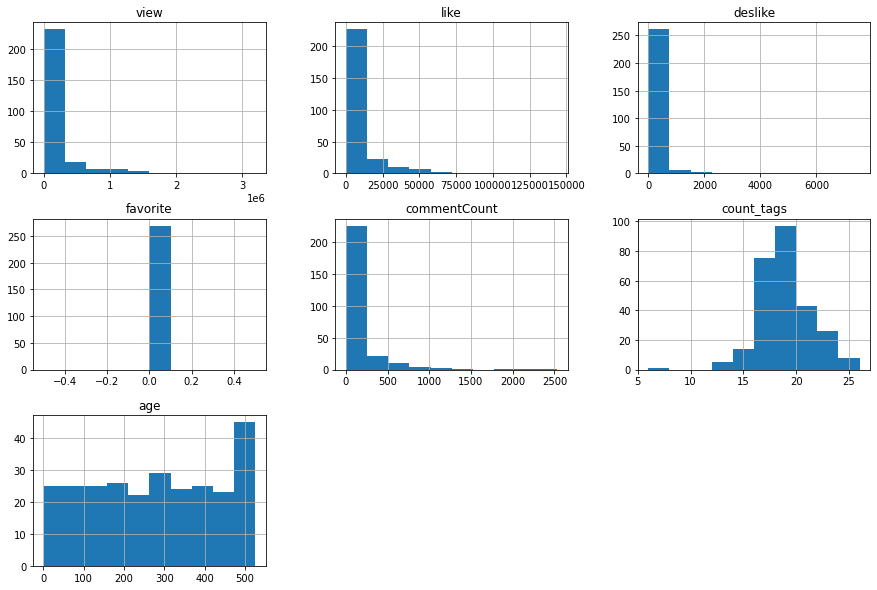

In [117]:
df1.hist(bins = 10, figsize=(15,10));

#### Correlação entre os dados

Será que há correlação entre os dados.

Vídeos postados anteriormente deveriam possuir mais comentários e visualização que os atuais?

Vídeos com mais tags são mais visualizados ou comentados?


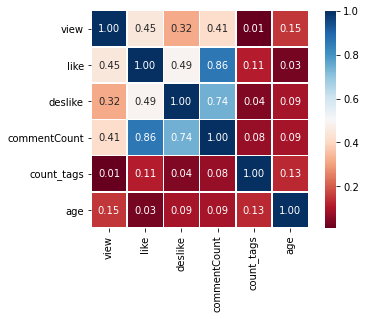

In [118]:
import seaborn as sns

df2 = df1.copy()
# optei por remover a feature favorite pois está zerada
df2.age = pd.to_numeric(df2.age)
corr = df2.drop('favorite', axis=1).corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linewidths=.5, linecolor='white', annot=True);

Interessante observar que não há uma correlação positiva entre a `idade` do vídeo e as demais informações (correlação negativa).

Como esperado `commentsCount` e `like` estão positivamente correlacionados com os views.

A quantidade de `tags` também não tem correlação positiva com a quantidade de `views`.

#### Velocidade de Publicações

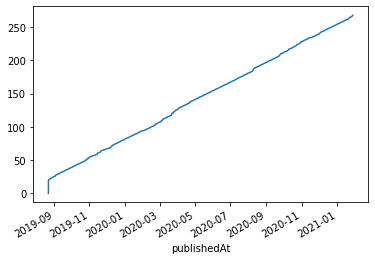

In [119]:
cumulative = df2.groupby(df2['publishedAt']).apply(lambda x: sum(df2['publishedAt']<x.name))
cumulative.plot()

# Conclusão

Esse notebbook iniciou-se como um exercício prático para elaboração de um web scraper a fim de obtenção dos dados de um canal no Youtube.

Aprofundando no assunto, percebo que acabei violando as regras de utilização e acabei bloqueado. O Youtube tem sérias restrições a acessos automatizados.

A fim de contornar a restrição procurei obter os dados a partir da API do Youtube que se mostrou muito mais amigável.
Aproveitei ainda para reforçar alguns conceitos de tratamento e visualização de dados.

Se você chegou até aqui não deixe de acompanhar meu [portfolio](https://github.com/mabittar/Portfolio) de projetos e novos posts no meu [site](https://mabittar.github.io/)